# Project: Investigating No-Show Appointments in Brazil - May 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What if it was possible to predict someone for a no-show, medical appointment? By analyzing around 100k medical appointments from Brazil in 2016, we can determine what factors influence patients to show up or not show up to their appointments. We will analyze 14 variables, where the variable headers are self-explanatory. The variable that we are most interested in is the No-show variable, where no means they did not show up to an appointment and yes means they did show up. This is also the dependent variable that is dependent upon any of the other independent variables. The scholarship variable could be found with the following link for more information:

> https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

<a id='pose_questions'></a>
## Posing Questions

**Question 1**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

To answer this question, we will be mainly looking at 5 variables with a focus on 3 of the 5 variables. First, we will compare the variables schoarlships, SMS_received, and alcoholism to the no-show variable to determine if the patient is influenced by one of the three variables stated. Then we will compare the relationship between the three variables. Lastly, we will compare the gender and age group with the no-show variable. 

In [1]:
# import all necessary packages and functions
import pandas as pd
import matplotlib.pyplot as plt

# See this page for more details on using the magic word to graph all visualizations
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section, we will load the data and print out a few lines. Next, perform operations to inspect data types and look for instances of missing or possibly errant data.

In [2]:
## This function will check what type of data each column is as well as how many rows by columns.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
## This function allows me to get an estimate of how many values are in each category and 
## thus, whether I need to clean up any data.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [4]:
# check for any missing or null values in dataset 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# check to make sure there is no duplicated data
print(sum(df.duplicated()))

0


In [6]:
# This will allow me to check for the parameters of the Age column so that 
# we can use it for a later exploration
df.Age.max()

115

In [7]:
df.Age.min()

-1

### Data Cleaning

With all the data mostly clean and no need to drop duplicates or replace missing values, we can focus mostly on the 5 variables that need to be analyzed. There is no need to make changes to the patient appointment times or neighborhood. We are interested in the variables that have only 2 unique values. The age of -1 is not a valid age so we need to drop this. Also, the column names need to be consistent with underscores in place of spaces. Some column names are spelled wrong as well. We will create bins for Ages so that we can use it on a later exploratory graph. Lastly, we are going to replace the Gender column with values of 0 and 1 to be consistent with other data.

In [9]:
# Query where the Age is -1.
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [41]:
# Drop the Age row where it is -1
df = df.drop(df.index[99832])

In [11]:
# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [12]:
"""
Clean up the column names
"""
# Rename columns so that each column has same format
df.rename(columns={'PatientId':'Patient_id', 'AppointmentID':'Appointment_id','ScheduledDay':'Scheduled_day',
                   'AppointmentDay':'Appointment_day', 'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension',
                   'Handcap':'Handicap','No-show':'No_show'},
inplace=True)
# confirm changes
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
"""
Next, we will be creating numeric values for the 'Gender' column. By doing this, we will be using pandas dummies
function. Then we will drop the 'Gender' column and concatenate the new Gender dummy column to our existing dataframe.
"""
# create dummy values
dummy = pd.get_dummies(df['Gender'])
# confirm changes
dummy.head()

,F,M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [14]:
# merge dummy values to original dataframe
df = pd.concat([df, dummy], axis = 1)
# confirm changes
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,F,M
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [15]:
# drop 'Gender' column since we no longer need this
df.drop(['Gender'], axis=1, inplace=True)
# confirm changes
df.head()

,Patient_id,Appointment_id,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,F,M
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [16]:
"""
This function inputs the new dataframe, cut_points, and labels to create bins for the 'Age' column. We will be needing 
this for a later exploratory graph.
"""
#create binning function
def binning(col, cut_points, labels=None):
    #Define min and max values
    minimum = col.min()
    maximum = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minimum] + cut_points + [maximum]
    
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["child","teen","young_adult","40s", "50s", "retirement", "70s", "80s", "90s", "100s", "110s"]
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
print(pd.value_counts(df["Age_Bin"], sort=False))

child          18749
teen           13099
young_adult    13783
40s            15052
50s            14420
retirement     15661
70s            11189
80s             5721
90s             2544
100s             301
110s               7
Name: Age_Bin, dtype: int64


# <a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned the data, we're ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. We must be systematic with our approach and look at one variable at a time, and then follow it up by looking at relationships between variables. To do this, we are going to compare the No-show variable to each of the three variables we are focusing on - scholarship, alcoholism, and SMS received. Then we are going to analyze the relationships between those three variables.

### Question 1: Does a scholarship influence the patient to show up for appointments?

In [17]:
"""
This function will determine how many showed up for appointments and how many didn't. This function will be
compared to all three of the questions we will be asking.
"""
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [18]:
"""
This function is the same as the last function and we will compare results to the No_show value counts as well as
the outputs of our other two questions."""
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [19]:
"""
This function will show how many of the no-shows had scholarships and how many that showed up did have scholarships.
This will provide us with a better estimate of whether scholarships influence patients to show up to appointments.
"""
df.groupby(["No_show", "Scholarship"]).size()

No_show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
dtype: int64

**Answer**: From the outputs of the functions, there were approximately 9/11 people who did show up and 2/11 people that did show up for appointments. In the scholarship count, approximately 10/11 people did not have scholarships and 1/11 people did. Thus, of the 2 people that did not show up to appointments, 1/2 had scholarships. This did not provide us with a good estimate if possessing a scholarship will influence patients to show up for appointments. By using the "groupby" function, it showed us that of the 10861 patients that did possess a scholarship, 8283 patients did not show up for an appointment while 2578 of them did show up for an appointment. Possessing a scholarship does not influence patients to show up for appointments.

### Question 2: Are there more no-shows with alcoholism or vice versa?

In [20]:
"""
This function is used to compare how many patients that showed up for appointments or not had alcoholism. This
function is similar to the last question's function except variables are switched.
"""
df.groupby(["No_show", "Alcoholism"]).size()

No_show  Alcoholism
No       0             85524
         1              2683
Yes      0             21642
         1               677
dtype: int64

**Answer:** Almost all patients did not have alcoholism - 0.3/11 had alcoholism while 10.7/11 did not have alcoholism. Of the 3360 patients that did have alcoholism, 2683 of them did not show for an appointment while 677 did show up for an appointment. Alcoholism does affect patients in showing up for appointments. There is a greater number of no-shows when alcoholism is present.

### Question 3: Does the option to receive SMS text messages influence the patient to show up for appointments? 

In [21]:
"""
This function is used to compare how many patients that showed up for appointments or not had text message notifications.
This function is similar to the last question's function except variables are switched.
"""
df.groupby(["No_show", "SMS_received"]).size()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
dtype: int64

**Answer:** There were approximately 3.5/11 patients that received text messages about appointments while 7.5 patients did not. Of the 35482 patients that did receive text messages, 25698 patients did not show up for their appointments and 9784 patients did show up for their appointments. Receiving text messages did not influence patients to show up for their appointments.

### Question 4: What are the relationships between the three variables investigated above?

To compare all three variables, we will be using groupby function and bar charts to compare two variables at a time. There will be 3 groupby functions and bar graphs presented for each relationship explored- scholarship and SMS_received, alcoholism and SMS_received, and alcoholism and scholarships.

**Scholarship and SMS_Received**

In [22]:
# Use groupby to get an estimate of what the graph should look like
df.groupby(["Scholarship", "SMS_received"]).size()

Scholarship  SMS_received
0            0               67688
             1               31977
1            0                7356
             1                3505
dtype: int64

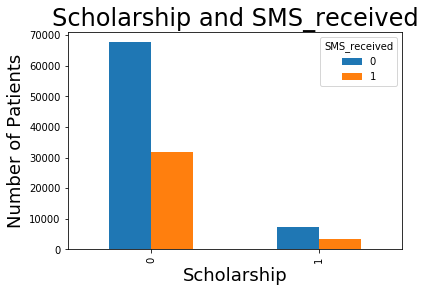

In [32]:
# Plot a bar graph based on groupby data
groups = df.groupby(['Scholarship','SMS_received']).size().unstack(fill_value=0)
groups.plot.bar()

# Set titles and axes
plt.title('Scholarship and SMS_received', fontsize = 24)
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

# use the magic word to show the bar graph
plt.show()

There is a direct relationship between scholarships and SMS_received. As scholarships increased, text messages received increased. This relationship can be found by dividing the amount of patients who receive text messages and scholarships by those that did not receive text messages and did receive scholarships - 3505/7356 = 0.476 - and by comparing it to dividing those that did receive text messages and did not receive scholarships by those that did not receive text messages or scholarships - 31977/67689= 0.472. To recap, as scholarships increased from 0 to 1, the proportion that received text messages to those that didnt increased from 0.472 to 0.476.

**Alcoholism and SMS_Received**

In [26]:
# Use groupby to get an estimate of what the graph should look like
df.groupby(["Alcoholism", "SMS_received"]).size()

Alcoholism  SMS_received
0           0               72531
            1               34635
1           0                2513
            1                 847
dtype: int64

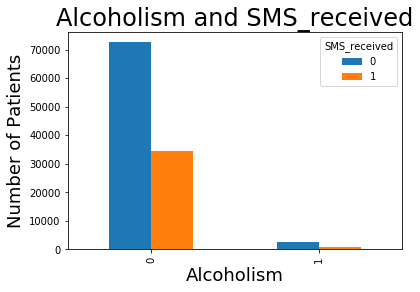

In [33]:
# Plot a bar graph based on groupby data
groups = df.groupby(['Alcoholism','SMS_received']).size().unstack(fill_value=0)
groups.plot.bar()

# Set titles and axes
plt.title('Alcoholism and SMS_received', fontsize = 24)
plt.xlabel('Alcoholism', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

# use the magic word to show the bar graph
plt.show()

There is a direct relationship between alcoholism and SMS_received. As alcoholism increased, text messages received increased. This relationship can be found by dividing the amount of patients who receive text messages and has alcoholism by those that did not receive text messages and has alcoholism - 847/2513 = 0.337 - and by comparing it to dividing those that did receive text messages and do not have alcoholism by those that did not receive text messages or have alcoholism - 34635/72532 = 0.478. To recap, as alcholism increased from 0 to 1, the proportion that received text messages to those that didnt increased from 0.337 to 0.478

**Alcoholism and Scholarship**

In [34]:
# Use groupby to get an estimate of what the graph should look like
df.groupby(["Scholarship", "Alcoholism"]).size()

Scholarship  Alcoholism
0            0             96833
             1              2832
1            0             10333
             1               528
dtype: int64

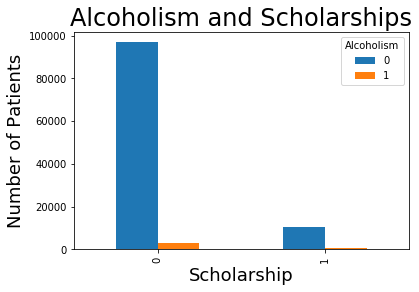

In [35]:
# Plot a bar graph based on groupby data
groups = df.groupby(['Scholarship','Alcoholism']).size().unstack(fill_value=0)
groups.plot.bar()

# Set titles and axes
plt.title('Alcoholism and Scholarships', fontsize = 24)
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

# use the magic word to show the bar graph
plt.show()

There is an indirect relationship between alcoholism and scholarships. As alcoholism increased, scholarships decreased. This relationship can be found by dividing the amount of patients who has alcoholism and scholarhips by those that did not have alcoholism and but has scholarships - 528/1033 = 0.051 - and by comparing it to dividing those that do have alcoholism and do not have scholarships by those that do not have alcoholism or scholarships - 2832/96834= 0.029. To recap, as alcholism increased from 0 to 1, the proportion that received scholarships to those that didnt decreased from 0.051 to 0.029.

### Question 5: How many patients were in each age group? 

In [36]:
"""
We are going to use the groupby function to see how many patients in each age group showed up or not to their
appointments. We must use 'Age_Bin' rather than 'Age' as a group because using 'Age' will give us too many values.
"""
# rerun the 'Age_Bin' column variable to make sure that the groupby function is able to run
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
# run the groupby function
df.groupby(['No_show', 'Age_Bin']).size()

No_show  Age_Bin    
No       child          14961
         teen            9791
         young_adult    10389
         40s            11820
         50s            11550
         retirement     12940
         70s             9541
         80s             4832
         90s             2137
         100s             242
         110s               4
Yes      child           3788
         teen            3308
         young_adult     3394
         40s             3232
         50s             2870
         retirement      2721
         70s             1648
         80s              889
         90s              407
         100s              59
         110s               3
dtype: int64

**Note:** By looking at the values that the groupby function gave us, we can deduce that there is approximately an equal number of patients that show up for their appointments from their childhood years to retirement. This means that the varied number of patients in each no-show age group, from childhood to retirement, will show us how many patients that did not show up for an appointment. We can go ahead and plot only the Age variable to determine the number of patients that did not show up for appointments. 

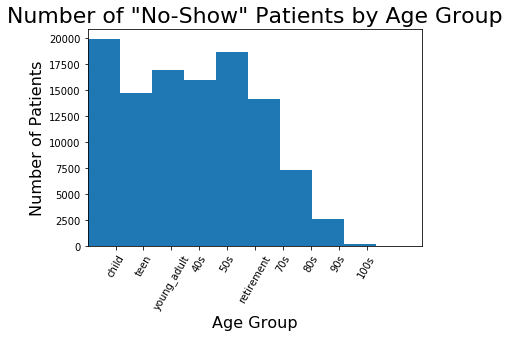

In [37]:
"""
By counting the number of patients that Brazil scheduled for an appointment, we can get an idea of how many illnesses
there are and the amount that did not show up for appointments within each age group.
"""
# Plot the histogram and set the xtick properties
ax = df['Age'].plot(kind='hist')
ax.set_xticks(cut_points)
ax.set_xticklabels(labels, rotation= 60, )

# Set histogram labels and titles
plt.xlabel('Age Group', fontsize= 16)
plt.ylabel('Number of Patients', fontsize=16)
plt.title('Number of "No-Show" Patients by Age Group', fontsize=22)
plt.xlim([0, 120])

# use the magic word to show the bar graph
plt.show()

**Answer:** By looking at the histogram graph, a great number of patients in their childhood, 50s, and retirement age group did not show up to appointments.

### Question 6: Does a certain gender influence whether one shows up to appointments or not?

In [38]:
"""
To answer this question, we are going to create a pie chart to determine which category influences patients to 
show up the most.
"""
# Obtain size of piechart categories used for 'cut_points' variable later on. Only one column, F or M, is used. 
# We are going to use F column so that 1 represents female and 0 represents male.
df.groupby(['No_show','F']).size()

No_show  F
No       0    30962
         1    57245
Yes      0     7725
         1    14594
dtype: int64

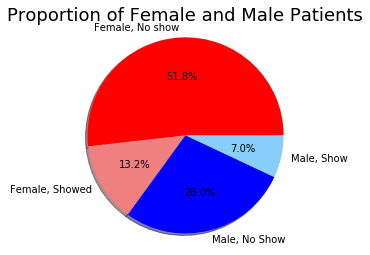

In [39]:
# Set pie chart properties
labels = 'Female, No show', 'Female, Showed', 'Male, No Show', 'Male, Show'
cut_points = [57245, 14594, 30962, 7725 ]
colors = ['red', 'lightcoral', 'blue', 'lightskyblue']

#Set piechart title and axis
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Proportion of Female and Male Patients', fontsize= 18)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()

**Answer:** By looking at the pie chart, approximately 1/5 of female patients- 13.2%/51.8% - showed up for appointments while approximately 1/4 of male patients- 7.0%/28.0%- showed up for appointments. Being a male influences one to show up to appointments more.

<a id='conclusions'></a>
## Conclusions

**Conclusion:** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? To answer this question, we looked at three variable - alcoholism, scholarships, and SMS_received. We determined that SMS_received and scholarships did not influence patients in showing up for their appointment. Alcholism did influence whether patients showed up for their appointment. We can infer that the factors that are related to a patient's health, and not their wealth or knowledge, affect whether they show up to appointments or not. It is also researched that alcoholism interferes with a person's activities of daily living (ADL) by requiring larger and larger amounts of alchol to get the same effect. This may influence a person to skip meetings or days of work, catch ups with friends, etc. It is no surprise that alcoholism will make it difficult for a patient to show up for their appointments. 

Secondly, we looked at the relationships between variables. We determined that there is an indirect relationship between alcoholism and scholarships received, a direct relationship between text messages received and alcoholism, and a direct relationship between text messages received and scholarships received. Although correlation does not mean causation, we are merely looking at the relationship between variables of whether it is direct or indirect. There is a strong indirect relationship between alcoholism and receiving scholarships. It is proven by research that alcohol hinders a person's rational thought and decision-making, the two functions of the prefrontal cortex [1]. A long-term case of alcoholism will affect grades in school and thus, whether one obtains a scholarship. 

Lastly, we compared age group and gender with no-show separately. The female population had approximately 1/5 that showed up for their appointments while males had approximately 1/4 that showed up to appointments. Furthermore, there were a greater pool of female patients than male patients, making the female population at a disadvantage to showing up for their appointments. Also, the age groups child (0-10), 50s and retirement(50-60) did not show up to their appointments the most. These two results from the gender pie chart and age group histogram do not follow the trend of other countries and their patient age group accessing healthcare [2].

A limitation of the data set is seeing the value in the columns given. A limitation of the data set is that I did not see much value in the appointment_id, patient_id, or scheduled_day columns. Almost every row for that column was either the same or had a unique value for each row. Another limitation of the data set is that the SMS_received column does not indicate the wealth status of the patient. Some patients may not have enough money to pay for extra text message rates and some may find text messages from their doctors as annoying. Another variable that may prove to be more useful in determining whether a patient shows up to their appointments could be income level. 

In conclusion, alcoholism, gender, and age group did affect patients in showing up for appointments. Alcoholism hindered patients in showing up for appointments. Females tended to not show up for appointments more than males. Children and adults in their 50s and 60s did not show up to their appointments the most. Limitations of the data set is that not all variables were useful and thus, not all variables were used. What could have helped in determining columns more useful is more information on Brazil, such as Brazil's neighborhood by income levels. 

[1]: https://www.psychologytoday.com/blog/you-illuminated/201006/your-brain-alcohol
[2]: http://ictph.org.in/analysing-patient-data-at-sughavazhvu-chief-complaints-and-diagnoses-of-patients-belonging-to-different-age-groups/

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0